## Module 3 Project
* Student name: Kyle Aguilar
* Student pace: full time online
* Scheduled project review date/time:
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://medium.com/@kyle.ags/binary-classification-of-household-income-in-the-philippines-75faa7b60b69

# Introduction

I downloaded the .csv file from Kaggle.com [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure). This is a survey conducted every three years by the Philippine Statistics Authority as the main source of data on household income information. There is a wide disparity between the upper and lower income households in the Philippines, and this data is used to measure the Gini coefficient both at the national and regional level. 

For the purpose of making this into a classification exercise, I am first changing my target column of Total Household Income from continuous values into 0-1, with 1 indicating that a household earns above the median, and 0 indicating that a household makes earns below the median. 

In [1]:
# Importing libraries necessary for EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import math

# Importing dataset, viewing first five rows
df=pd.read_csv('Family Income and Expenditure.csv')
df.head()

Total Household Income Region  Total Food Expenditure  \
0                  480332    CAR                  117848   
1                  198235    CAR                   67766   
2                   82785    CAR                   61609   
3                  107589    CAR                   78189   
4                  189322    CAR                   94625   

  Main Source of Income  Agricultural Household indicator  \
0         Wage/Salaries                                 0   
1         Wage/Salaries                                 0   
2         Wage/Salaries                                 1   
3         Wage/Salaries                                 0   
4         Wage/Salaries                                 0   

   Bread and Cereals Expenditure  Total Rice Expenditure  Meat Expenditure  \
0                          42140                   38300             24676   
1                          17329                   13008             17434   
2                          34182                   32001              7783   
3                          34030                   28659             10914   
4                          34820                   30167             18391   

   Total Fish and  marine products Expenditure  Fruit Expenditure  ...  \
0                                        16806               3325  ...   
1                                        11073               2035  ...   
2                                         2590               1730  ...   
3                                        10812                690  ...   
4                                        11309               1395  ...   

   Number of Refrigerator/Freezer  Number of Washing Machine  \
0                               1                          1   
1                               0                          1   
2                               0                          0   
3                               0                          0   
4                               1                          0   

   Number of Airconditioner  Number of Car, Jeep, Van  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Number of Landline/wireless telephones  Number of Cellular phone  \
0                                       0                         2   
1                                       0                         3   
2                                       0                         0   
3                                       0                         1   
4                                       0                         3   

   Number of Personal Computer  Number of Stove with Oven/Gas Range  \
0                            1                                    0   
1                            1                                    0   
2                            0                                    0   
3                            0                                    0   
4                            0                                    0   

   Number of Motorized Banca  Number of Motorcycle/Tricycle  
0                          0                              1  
1                          0                              2  
2                          0                              0  
3                          0                              0  
4                          0                              1  

[5 rows x 60 columns]

In [2]:
df.describe()

Total Household Income  Total Food Expenditure  \
count            4.154400e+04            41544.000000   
mean             2.475556e+05            85099.158194   
std              2.868805e+05            51637.947682   
min              1.128500e+04             2947.000000   
25%              1.048950e+05            51017.250000   
50%              1.640795e+05            72985.500000   
75%              2.911385e+05           105635.500000   
max              1.181599e+07           827565.000000   

       Agricultural Household indicator  Bread and Cereals Expenditure  \
count                      41544.000000                   41544.000000   
mean                           0.429858                   25133.723642   
std                            0.676666                   13466.482984   
min                            0.000000                       0.000000   
25%                            0.000000                   16556.000000   
50%                            0.000000                   23324.000000   
75%                            1.000000                   31439.000000   
max                            2.000000                  765864.000000   

       Total Rice Expenditure  Meat Expenditure  \
count            41544.000000      41544.000000   
mean             18195.825005      10540.072574   
std              11727.224350      10497.727757   
min                  0.000000          0.000000   
25%              11020.000000       3353.750000   
50%              16620.000000       7332.500000   
75%              23920.000000      14292.000000   
max             758326.000000     261566.000000   

       Total Fish and  marine products Expenditure  Fruit Expenditure  \
count                                 41544.000000       41544.000000   
mean                                  10529.318337        2550.474990   
std                                    7812.201613        2969.752879   
min                                       0.000000           0.000000   
25%                                    5504.000000        1024.750000   
50%                                    8695.000000        1820.000000   
75%                                   13388.000000        3100.000000   
max                                  188208.000000      273769.000000   

       Vegetables Expenditure  Restaurant and hotels Expenditure  ...  \
count            41544.000000                       41544.000000  ...   
mean              5006.918568                       15436.566075  ...   
std               3300.175236                       23705.195929  ...   
min                  0.000000                           0.000000  ...   
25%               2873.000000                        1930.000000  ...   
50%               4314.000000                        7314.000000  ...   
75%               6304.250000                       19921.250000  ...   
max              74800.000000                      725296.000000  ...   

       Number of Refrigerator/Freezer  Number of Washing Machine  \
count                    41544.000000               41544.000000   
mean                         0.394184                   0.319806   
std                          0.537025                   0.478482   
min                          0.000000                   0.000000   
25%                          0.000000                   0.000000   
50%                          0.000000                   0.000000   
75%                          1.000000                   1.000000   
max                          5.000000                   3.000000   

       Number of Airconditioner  Number of Car, Jeep, Van  \
count              41544.000000              41544.000000   
mean                   0.129814                  0.081215   
std                    0.448673                  0.346786   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%       

In [3]:
# Changing linear target column into a binary classification problem
income_median = df['Total Household Income'].median()
df.loc[df['Total Household Income'] < income_median , 'Total Household Income'] = 0
df.loc[df['Total Household Income'] >= income_median , 'Total Household Income'] = 1
df['Total Household Income'].value_counts()

1    20772
0    20772
Name: Total Household Income, dtype: int64

# Data Cleaning

I am conducting a limited amount of data cleaning here that is mainly focused on the datatypes and missing values in order to identify columns that can be dropped as we are starting with 59 variables.

In [4]:
# Identifying columns with missing values that can be dropped
df.isna().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

As these features are objects, I will already proceed with dropping these columns from the main dataframe.

In [5]:
# dropping columns from dataframe
df.drop(columns=['Household Head Occupation', 'Household Head Class of Worker'],\
        axis=0, inplace=True)

In [6]:
# creating dataframe of remaining object columns so I can explore which ones will be kept
target = df[['Total Household Income']]
df_objects = df.select_dtypes(include=['object'])
df_objects['Total Household Income'] = target
df_objects.head()

Region Main Source of Income Household Head Sex  \
0    CAR         Wage/Salaries             Female   
1    CAR         Wage/Salaries               Male   
2    CAR         Wage/Salaries               Male   
3    CAR         Wage/Salaries               Male   
4    CAR         Wage/Salaries               Male   

  Household Head Marital Status  \
0                        Single   
1                       Married   
2                       Married   
3                       Married   
4                       Married   

             Household Head Highest Grade Completed  \
0  Teacher Training and Education Sciences Programs   
1                       Transport Services Programs   
2                                           Grade 3   
3                               Elementary Graduate   
4                               Elementary Graduate   

  Household Head Job or Business Indicator Type of Household  \
0                        With Job/Business   Extended Family   
1                        With Job/Business     Single Family   
2                        With Job/Business     Single Family   
3                        With Job/Business     Single Family   
4                        With Job/Business     Single Family   

  Type of Building/House                                       Type of Roof  \
0           Single house  Strong material(galvanized,iron,al,tile,concre...   
1           Single house  Strong material(galvanized,iron,al,tile,concre...   
2           Single house                 Light material (cogon,nipa,anahaw)   
3           Single house                 Light material (cogon,nipa,anahaw)   
4           Single house                 Light material (cogon,nipa,anahaw)   

  Type of Walls                                  Tenure Status  \
0        Strong  Own or owner-like possession of house and lot   
1        Strong  Own or owner-like possession of house and lot   
2         Light  Own or owner-like possession of house and lot   
3         Light  Own or owner-like possession of house and lot   
4  Quite Strong  Own or owner-like possession of house and lot   

                                   Toilet Facilities  \
0  Water-sealed, sewer septic tank, used exclusiv...   
1  Water-sealed, sewer septic tank, used exclusiv...   
2  Water-sealed, sewer septic tank, shared with o...   
3                                         Closed pit   
4  Water-sealed, sewer septic tank, used exclusiv...   

               Main Source of Water Supply  Total Household Income  
0  Own use, faucet, community water system                       1  
1  Own use, faucet, community water system                       1  
2   Shared, faucet, community water system                       0  
3  Own use, faucet, community water system                       0  
4  Own use, faucet, community water system                       1

In [7]:
# printing value counts for object features
for col in df_objects.columns[:-1]:
    print(f'Value Counts for Object Column {col}')
    print(df[col].value_counts())
    print('------------------------------')

Value Counts for Object Column Region
IVA - CALABARZON             4162
NCR                          4130
III - Central Luzon          3237
VI - Western Visayas         2851
VII - Central Visayas        2541
V - Bicol Region             2472
XI - Davao Region            2446
I - Ilocos Region            2348
VIII - Eastern Visayas       2337
 ARMM                        2248
II - Cagayan Valley          2219
XII - SOCCSKSARGEN           2122
X - Northern Mindanao        1887
IX - Zasmboanga Peninsula    1788
Caraga                       1782
CAR                          1725
IVB - MIMAROPA               1249
Name: Region, dtype: int64
------------------------------
Value Counts for Object Column Main Source of Income
Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: Main Source of Income, dtype: int64
------------------------------
Value Counts for Object Column Household Head Sex
Male      32483
Female     9061
Name: Hous

Based on this first pass I will leave out the Region and Level of Education columns as they contain a great variety of information that will add too many one-hot columns, were I to create dummy variables for each value. However, a number of these could potentially be simplified and turned into 1-0 columns without creating additional columns (ex: Main Source of Water Supply could be turned into 1-0 where 1 indicates all homes with own-use water supply and 0 indicates all other values). 

In [8]:
# Dropping columns both from main dataframe and object dataframe
df.drop(columns=['Region', 'Household Head Highest Grade Completed'], axis=0,\
        inplace=True)
df_objects.drop(columns=['Region', 'Household Head Highest Grade Completed'],\
                axis=0, inplace=True)

Rather than adding additional columns to our dataset using all of the unique values in my object categories, I would rather view each of them and how they may or may not impact our target, and either drop them or simplify the variable to a single binary indicator column.

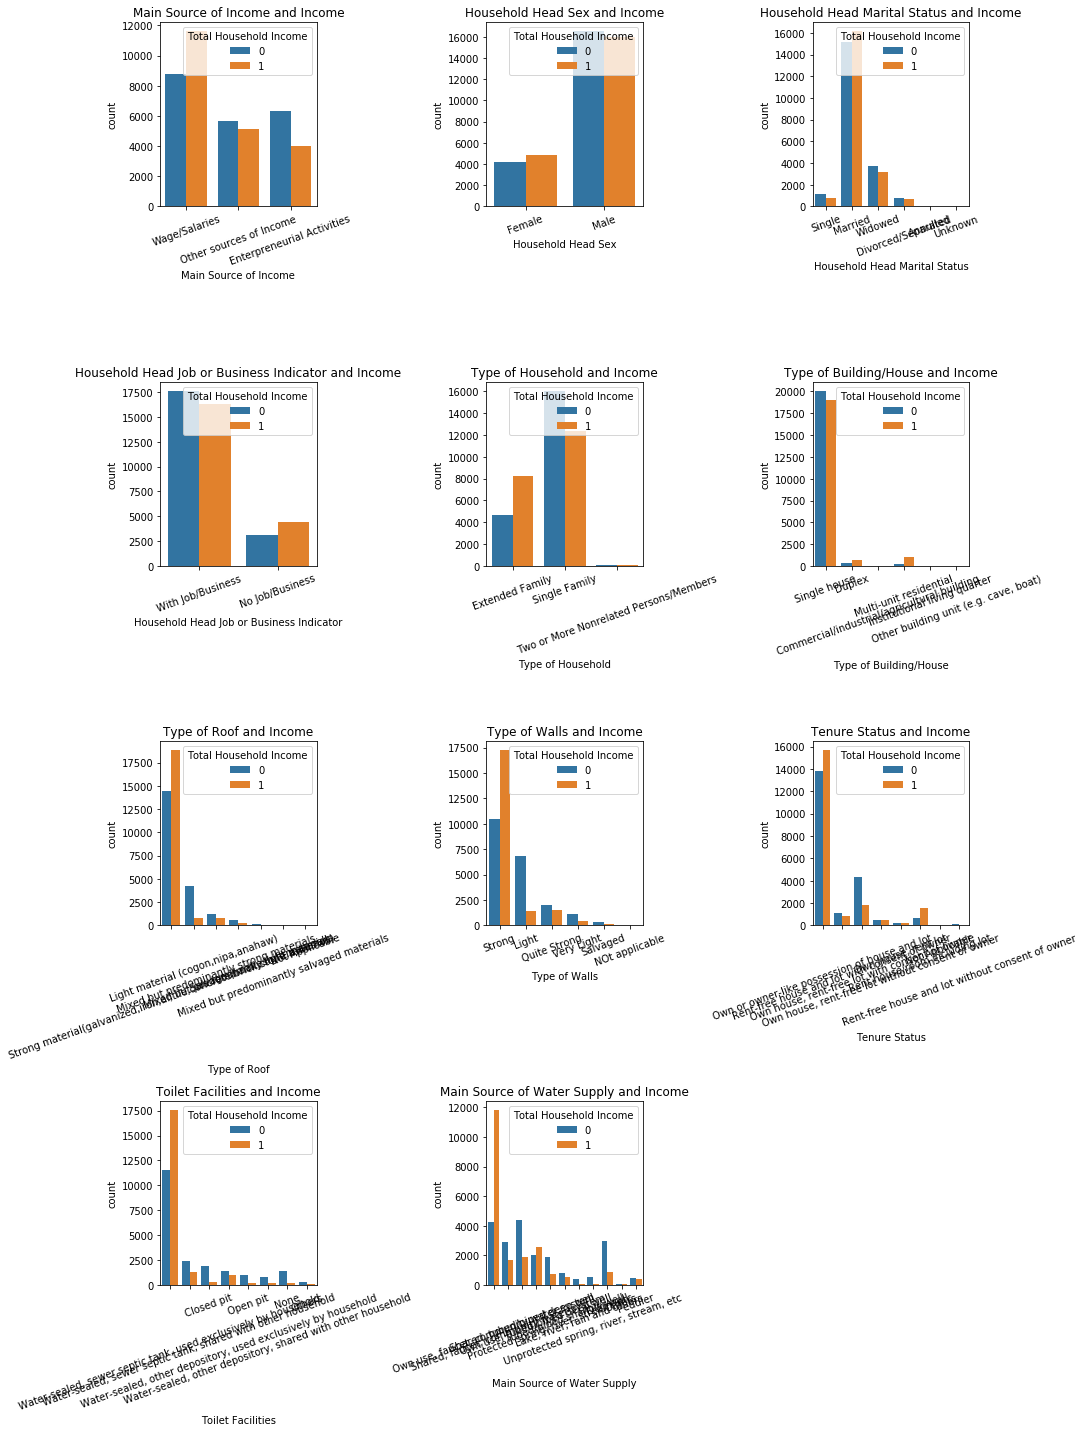

In [9]:
# creating plots of object variables to identify those that have some impact on salary
f = plt.figure(figsize=(15,20))
for i, col in enumerate(df_objects.columns[:-1]):
    f.add_subplot(4, 3, i+1)
    sns.countplot(x=col,hue='Total Household Income',data=df_objects)
    plt.xticks(rotation=20)
    plt.title(f'{col} and Income')
f.tight_layout()
plt.show()

As a number of these object variables have no clear correlation with Household Income, I am either turning them into one-hot encoded columns or dropping them entirely.

In [10]:
# Dropping columns where there is no clear probability that the value of a feature is a strong indication of household income
df.drop(columns=['Household Head Sex', 'Household Head Job or Business Indicator', 'Tenure Status', 'Household Head Marital Status', 'Type of Building/House'], axis=0, inplace=True)

# Changing other remaining object columns in main df to one-hot where there is a visible correlation between the variable (or a value of the variable) and household income
df.loc[df['Main Source of Income'] != 'Wage/Salaries' , 'Main Source of Income'] = 0
df.loc[df['Main Source of Income'] == 'Wage/Salaries' , 'Main Source of Income'] = 1

df.loc[df['Type of Household'] != 'Single Family' , 'Type of Household'] = 0
df.loc[df['Type of Household'] == 'Single Family' , 'Type of Household'] = 1
df.rename(columns = {'Type of Household':'Single Family'}, inplace = True) 

df.loc[df['Type of Roof'] != 'Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)' , 'Type of Roof'] = 0
df.loc[df['Type of Roof'] == 'Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)' , 'Type of Roof'] = 1
df.rename(columns = {'Type of Roof':'Strong Roof Materials'}, inplace = True) 

df.loc[df['Type of Walls'] != 'Strong' , 'Type of Walls'] = 0
df.loc[df['Type of Walls'] == 'Strong' , 'Type of Walls'] = 1
df.rename(columns = {'Type of Walls':'Strong Wall Materials'}, inplace = True) 

df.loc[df['Toilet Facilities'] != 'Water-sealed, sewer septic tank, used exclusively by household' , 'Toilet Facilities'] = 0
df.loc[df['Toilet Facilities'] == 'Water-sealed, sewer septic tank, used exclusively by household' , 'Toilet Facilities'] = 1
df.rename(columns = {'Toilet Facilities':'Exclusive Use Septic Tank'}, inplace = True) 

df.loc[df['Main Source of Water Supply'] != 'Own use, faucet, community water system' , 'Main Source of Water Supply'] = 0
df.loc[df['Main Source of Water Supply'] == 'Own use, faucet, community water system' , 'Main Source of Water Supply'] = 1
df.rename(columns = {'Main Source of Water Supply':'Exclusive Use Faucet'}, inplace = True) 

In [11]:
# Checking to ensure there are no duplicate rows as there are no unique keys
df[df.duplicated()]

Empty DataFrame
Columns: [Total Household Income, Total Food Expenditure, Main Source of Income, Agricultural Household indicator, Bread and Cereals Expenditure, Total Rice Expenditure, Meat Expenditure, Total Fish and  marine products Expenditure, Fruit Expenditure, Vegetables Expenditure, Restaurant and hotels Expenditure, Alcoholic Beverages Expenditure, Tobacco Expenditure, Clothing, Footwear and Other Wear Expenditure, Housing and water Expenditure, Imputed House Rental Value, Medical Care Expenditure, Transportation Expenditure, Communication Expenditure, Education Expenditure, Miscellaneous Goods and Services Expenditure, Special Occasions Expenditure, Crop Farming and Gardening expenses, Total Income from Entrepreneurial Acitivites, Household Head Age, Single Family, Total Number of Family members, Members with age less than 5 year old, Members with age 5 - 17 years old, Total number of family members employed, Strong Roof Materials, Strong Wall Materials, House Floor Area, House Age, Number of bedrooms, Exclusive Use Septic Tank, Electricity, Exclusive Use Faucet, Number of Television, Number of CD/VCD/DVD, Number of Component/Stereo set, Number of Refrigerator/Freezer, Number of Washing Machine, Number of Airconditioner, Number of Car, Jeep, Van, Number of Landline/wireless telephones, Number of Cellular phone, Number of Personal Computer, Number of Stove with Oven/Gas Range, Number of Motorized Banca, Number of Motorcycle/Tricycle]
Index: []

[0 rows x 51 columns]

# Data Exploration

In [12]:
# Viewing correlations to identify multicollinearity
abs(df.corr()) > 0.75

Total Household Income  \
Total Household Income                                           True   
Total Food Expenditure                                          False   
Main Source of Income                                           False   
Agricultural Household indicator                                False   
Bread and Cereals Expenditure                                   False   
Total Rice Expenditure                                          False   
Meat Expenditure                                                False   
Total Fish and  marine products Expenditure                     False   
Fruit Expenditure                                               False   
Vegetables Expenditure                                          False   
Restaurant and hotels Expenditure                               False   
Alcoholic Beverages Expenditure                                 False   
Tobacco Expenditure                                             False   
Clothing, Footwear and Other Wear Expenditure                   False   
Housing and water Expenditure                                   False   
Imputed House Rental Value                                      False   
Medical Care Expenditure                                        False   
Transportation Expenditure                                      False   
Communication Expenditure                                       False   
Education Expenditure                                           False   
Miscellaneous Goods and Services Expenditure                    False   
Special Occasions Expenditure                                   False   
Crop Farming and Gardening expenses                             False   
Total Income from Entrepreneurial Acitivites                    False   
Household Head Age                                              False   
Single Family                                                   False   
Total Number of Family members                                  False   
Members with age less than 5 year old                           False   
Members with age 5 - 17 years old                               False   
Total number of family members employed                         False   
Strong Roof Materials                                           False   
Strong Wall Materials                                           False   
House Floor Area                                                False   
House Age                                                       False   
Number of bedrooms                                              False   
Exclusive Use Septic Tank                                       False   
Electricity                                                     False   
Exclusive Use Faucet                                            False   
Number of Television                                            False   
Number of CD/VCD/DVD                                            False   
Number of Component/Stereo set                                  False   
Number of Refrigerator/Freezer                                  False   
Number of Washing Machine                                       False   
Number of Airconditioner                                        False   
Number of Car, Jeep, Van                                        False   
Number of Landline/wireless telephones                          False   
Number of Cellular phone                                        False   
Number of Personal Computer                                     False   
Number of Stove with Oven/Gas Range                             False   
Number of Motorized Banca                                       False   
Number of Motorcycle/Tricycle                                   False   

                                               Total Food Expenditure  \
Total Household Income                                          False   
Total Food Expenditure                                           True   
Main Source of Income          

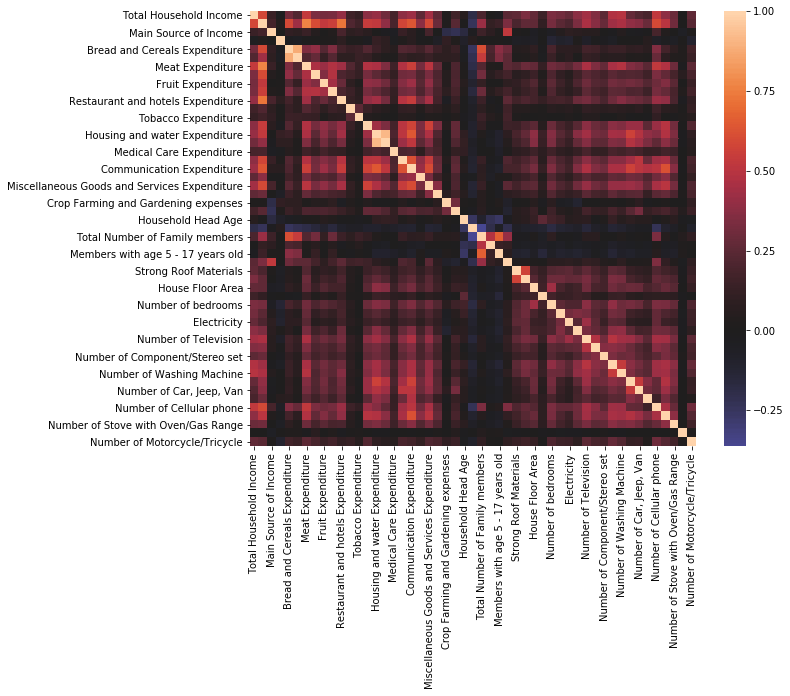

In [13]:
# Viewing correlations as heatmap
fig = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), center=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23c78cc0>,
      dtype=object)

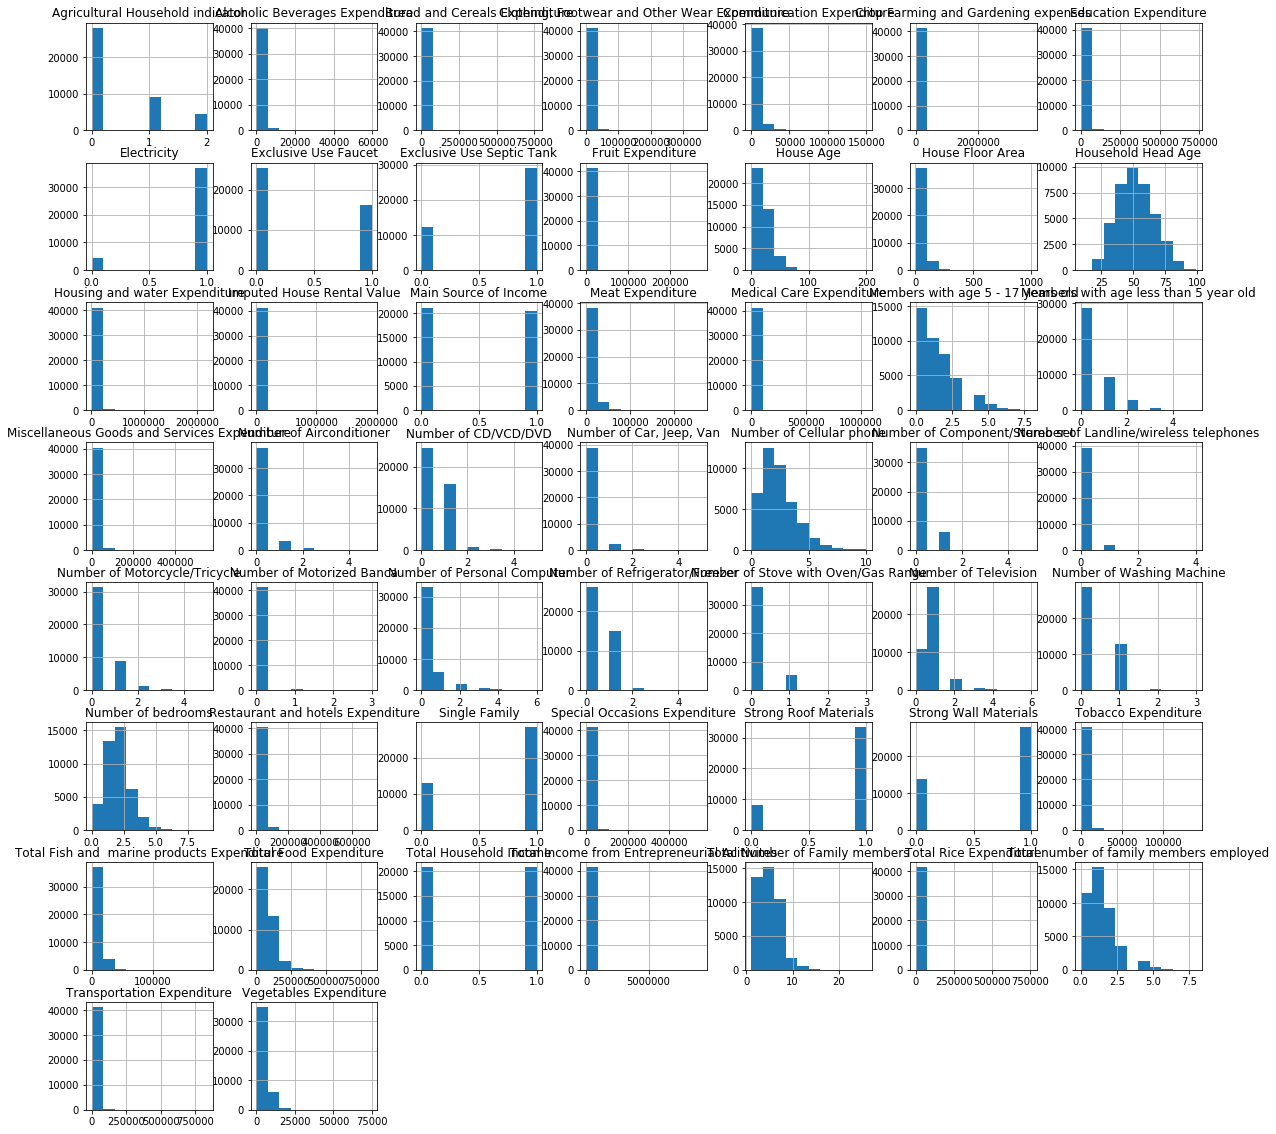

In [14]:
# Viewing histogram of distributions of all variables 
df.hist(figsize=(20, 20))

In [15]:
# Viewing value counts for features that have very skewed distribution towards 0
vars = ['Alcoholic Beverages Expenditure', 'Bread and Cereals Expenditure',
        'Communication Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
        'Education Expenditure', 'Crop Farming and Gardening expenses',
        'Fruit Expenditure', 'Housing and water Expenditure', 'Imputed House Rental Value',
        'Medical Care Expenditure', 'Miscellaneous Goods and Services Expenditure',
        'Number of Motorized Banca', 'Special Occasions Expenditure', 
        'Total Income from Entrepreneurial Acitivites', 'Total Rice Expenditure']
for var in vars:
    print(f'Value Counts for Continuous Variable Column {var}')
    print(df[var].value_counts())
    print('------------------------------')

Value Counts for Continuous Variable Column Alcoholic Beverages Expenditure
0        16830
240        345
300        309
540        300
480        299
         ...  
10571        1
2351         1
12584        1
2586         1
7948         1
Name: Alcoholic Beverages Expenditure, Length: 4084, dtype: int64
------------------------------
Value Counts for Continuous Variable Column Bread and Cereals Expenditure
0        15
20734     9
21930     8
8758      8
15520     8
         ..
32703     1
34752     1
36801     1
40899     1
16362     1
Name: Bread and Cereals Expenditure, Length: 26082, dtype: int64
------------------------------
Value Counts for Continuous Variable Column Communication Expenditure
0        4204
360       436
720       391
1200      384
600       356
         ... 
23682       1
15474       1
19680       1
31974       1
7188        1
Name: Communication Expenditure, Length: 3826, dtype: int64
------------------------------
Value Counts for Continuous Variable Column C

In [16]:
# dropping features that have very little non-0 data
df.drop(columns=['Number of Motorized Banca', 'Crop Farming and Gardening expenses'],
        inplace=True)

In [17]:
# viewing shape and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 49 columns):
Total Household Income                           41544 non-null int64
Total Food Expenditure                           41544 non-null int64
Main Source of Income                            41544 non-null int64
Agricultural Household indicator                 41544 non-null int64
Bread and Cereals Expenditure                    41544 non-null int64
Total Rice Expenditure                           41544 non-null int64
Meat Expenditure                                 41544 non-null int64
Total Fish and  marine products Expenditure      41544 non-null int64
Fruit Expenditure                                41544 non-null int64
Vegetables Expenditure                           41544 non-null int64
Restaurant and hotels Expenditure                41544 non-null int64
Alcoholic Beverages Expenditure                  41544 non-null int64
Tobacco Expenditure                              41

# Model

Every model is being validated with a train-test split in order to measure whether our models are over/underfit to new data it has not seen before, and I am creating a summary dataframe with the scores for each model. 

Within a larger performance evaluation function I am adding scores to the dataframe, showing a normalized confusion matrix to visualize how our model classified data in prediction.

Additionally, I am creating a feature ranking visualization function that can be used with pipelines later in modeling to show which features have the most significant impact on splits in decision trees.

In [18]:
# creating 70/30 train/test split
from sklearn.model_selection import train_test_split
y = df[['Total Household Income']]
X = df.drop(['Total Household Income'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

29080 12464 29080 12464


In [19]:
# creating lists to evaluate model performance
model_names = []
f1_list = []
accuracy_list = []
precision_list = []
recall_list = []

In [20]:
# importing libraries to create evaluation function
from sklearn.metrics import plot_roc_curve, f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import scikitplot as skplt

def evaluate_performance(y_test, y_pred, model_name):
    # adding performance metrics to lists
    model_names.append(model_name)
    f1_list.append(round(f1_score(y_test, y_pred), 4))
    accuracy_list.append(round(accuracy_score(y_test, y_pred), 4))
    precision_list.append(round(precision_score(y_test, y_pred), 4))
    recall_list.append(round(recall_score(y_test, y_pred), 4))

    # printing performance metrics
    print(f'Test F1 Score: {round(f1_score(y_test, y_pred), 4)}')
    print(f'Test Accuracy Score: {round(accuracy_score(y_test, y_pred), 4)}')
    print(f'Test Precision Score: {round(precision_score(y_test, y_pred), 4)}')
    print(f'Test Recall Score: {round(recall_score(y_test, y_pred), 4)}')
    
    # displaying confusion matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(5,5), normalize=True)
    plt.title(f'Confusion Matrix for {model_name}')

def plot_feature_importances(model):
    temp_df = pd.DataFrame({'Feature': X_train.columns.values,\
                            'Importance': model.steps[1][1].feature_importances_})
    temp_df = temp_df.sort_values(by=['Importance'], ascending=False)
    sns.set(style='whitegrid')   
    plt.figure(figsize=(8,10))
    ax = sns.barplot(x=temp_df['Importance'], y=temp_df['Feature'], palette='Blues_d')
    ax.set_title(f'Sorted Feature Importances for {model.steps[1][0]}')

## Model 1.1 - Logistic Regression

For my baseline model I used Logistic Regression, which takes our predictors and calculates the probability of belonging to a group in order to classify a datapoint using a log function.

Training Accuracy Score: 1.0
Training F1 Score: 1.0
Test F1 Score: 0.8614
Test Accuracy Score: 0.8737
Test Precision Score: 0.9596
Test Recall Score: 0.7815


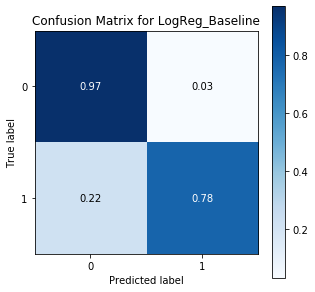

In [22]:
# importing library for initial model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# scaling data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# creating instance of our model
logreg = LogisticRegression(fit_intercept=False)
logreg.fit(scaled_X_train, y_train)
y_pred_test = logreg.predict(scaled_X_test)
y_pred_train = logreg.predict(scaled_X_train)

print(f'Training Accuracy Score: {round(accuracy_score(y_train, y_pred_train))}')
print(f'Training F1 Score: {round(f1_score(y_train, y_pred_train))}')
evaluate_performance(y_test, y_pred_test, 'LogReg_Baseline')

### Model 1.2: Logit Model with Feature Selection
To improve on this estimator I am using Recursive Feature Elimination to identify any further removal of features, using a for loop to identify the number to keep that leaves us with the highest f1 score. I will continue to use these selected variables throughout the remaining models. RFE is a wrapper method that works by removing attributes in turn to create a ranking of features based on model accuracy.

In [23]:
# importing library for recursive feature selection
from sklearn.feature_selection import RFE

# determining best number of features for Logistic Regression in RFE
best_no_of_features = 0
best_rfe_score = 0.0
for i in range(10, len(X.columns)):
    selector = RFE(logreg, n_features_to_select=i)
    selector = selector.fit(scaled_X_train, y_train)
    y_pred = selector.predict(scaled_X_test)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_rfe_score:
        best_no_of_features = i
        best_rfe_score = f1

print(f'Best Number of Features for RFE: {best_no_of_features}')
print(f'Best RFE F1-Score: {best_rfe_score}')

Best Number of Features for RFE: 40
Best RFE F1-Score: 0.8620720007041633


In [24]:
# creating class instance of RFE and setting max # of variables, fitting to scaled data
selector = RFE(logreg, n_features_to_select=best_no_of_features)
selector = selector.fit(scaled_X_train, y_train)

# printing selected features 
feature_rank = selector.ranking_
feature_list = []
for i, var in enumerate(feature_rank):
    if var == 1:
        feature_list.append(X_train.columns[i])

print(feature_list)

['Total Food Expenditure', 'Main Source of Income', 'Agricultural Household indicator', 'Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Total Fish and  marine products Expenditure', 'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure', 'Imputed House Rental Value', 'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 'Education Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Total Income from Entrepreneurial Acitivites', 'Total Number of Family members', 'Members with age less than 5 year old', 'Members with age 5 - 17 years old', 'Total number of family members employed', 'Strong Roof Materials', 'Strong Wall Materials', 'House Floor Area', 'House Age', 'Number of bedrooms', 'Exclusive Use Septic Tank', 'Electricity', 'Exclusive Use Faucet', 'Number of Television', 'Numbe

Training Accuracy Score: 1.0
Training F1 Score: 1.0
Test F1 Score: 0.8621
Test Accuracy Score: 0.8743
Test Precision Score: 0.9602
Test Recall Score: 0.7821


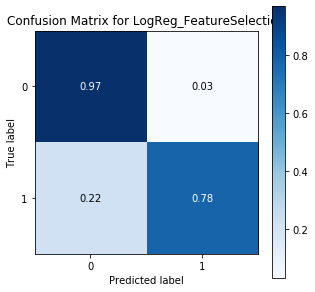

In [25]:
# predicting with X test data
y_pred_test = selector.predict(scaled_X_test)
y_pred_train = selector.predict(scaled_X_train)

# evaluating model performance
print(f'Training Accuracy Score: {round(accuracy_score(y_train, y_pred_train))}')
print(f'Training F1 Score: {round(f1_score(y_train, y_pred_train))}')
evaluate_performance(y_test, y_pred_test, 'LogReg_FeatureSelection')

### Further Adjustments to Features

For all subsequent models I will only be using the 40 features that were selected in the Recursive Feature Elimination process, thus trimming an additional 9 variables.

In [26]:
# identifying columns to be dropped
dropped_columns = []
for col in X.columns:
    if col not in feature_list:
        dropped_columns.append(col)

# dropping columns
X_train.drop(columns=dropped_columns, axis=0, inplace=True)
X_test.drop(columns=dropped_columns, axis=0, inplace=True)

# viewing resulting dataframe shape
X_train.shape

(29080, 40)

Notably, these models result in very high precision scores, so of all predicted positives, a high percentage of those predictions were correct. 

## Model 2 - K-Nearest Neighbors

Next, I am using K-Nearest Neighbors, a classification method wherein labels are predicted based on the labels of training data that are "closest" to the model validation datapoint. Therefore, there is no "fitting" a model as such, just saving the training data in order to use test data against it. Through a for loop to determine K-value with the best F1 score, I made predictions using 21 neighbors. 

In [27]:
# importing pipeline and estimator
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# re-scaling data in order to identify best k-value
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
    
# determining best K-value using for loop and f1 score
best_k = 0
best_score = 0.0
for k in range(1, 25, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    preds = knn.predict(scaled_X_test)
    f1 = f1_score(y_test, preds)
    if f1 > best_score:
        best_k = k
        best_score = f1

print("Best Value for k: {}".format(best_k))
print("F1-Score: {}".format(best_score))

Best Value for k: 21
F1-Score: 0.839475549255847


Training Accuracy Score: 1.0
Training F1 Score: 1.0
Test F1 Score: 0.8395
Test Accuracy Score: 0.8546
Test Precision Score: 0.9425
Test Recall Score: 0.7567


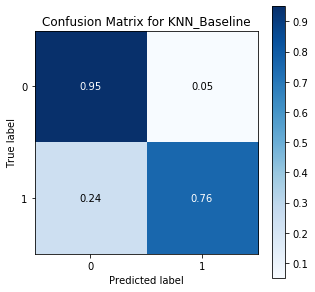

In [28]:
# creating pipeline with best_k
knn_pipeline = Pipeline([('ss', StandardScaler()),
                        ('knn', KNeighborsClassifier(n_neighbors=best_k))])

# fitting and predicting pipeline
knn_pipeline.fit(X_train, y_train)
y_pred_test = knn_pipeline.predict(X_test)
y_pred_train = knn_pipeline.predict(X_train)

# evaluating performance 
print(f'Training Accuracy Score: {round(accuracy_score(y_train, y_pred_train))}')
print(f'Training F1 Score: {round(f1_score(y_train, y_pred_train))}')
evaluate_performance(y_test, y_pred_test, 'KNN_Baseline')

This model performed the most poorly amongst all models that I used, and achieved an F1 score of .8395, although as with our prior models, % of predicted positives being labeled correctly remains high.

## Model 3 - Decision Tree

Before I proceed with running a Random Forest model, I am first going to fit a decision tree with no max depth, to visualize what we expect to be a very overfit model. 

Training Accuracy Score: 1.0
Training F1 Score: 1.0
Test F1 Score: 0.8612
Test Accuracy Score: 0.8602
Test Precision Score: 0.8589
Test Recall Score: 0.8634


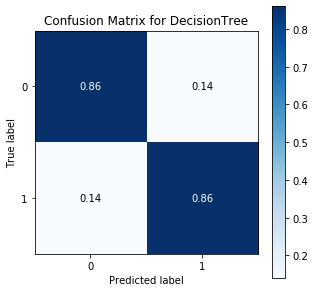

In [29]:
# importing estimator library
from sklearn.tree import DecisionTreeClassifier

# creating pipeline
dt_pipeline = Pipeline([('ss', StandardScaler()),
                        ('decsT', DecisionTreeClassifier(random_state=42, max_depth=None))])

# fitting model
dt_pipeline.fit(X_train, y_train)
y_pred_test = dt_pipeline.predict(X_test)
y_pred_train = dt_pipeline.predict(X_train)

# evaluating performance 
print(f'Training Accuracy Score: {round(accuracy_score(y_train, y_pred_train))}')
print(f'Training F1 Score: {round(f1_score(y_train, y_pred_train))}')
evaluate_performance(y_test, y_pred_test, 'DecisionTree')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.227498 to fit



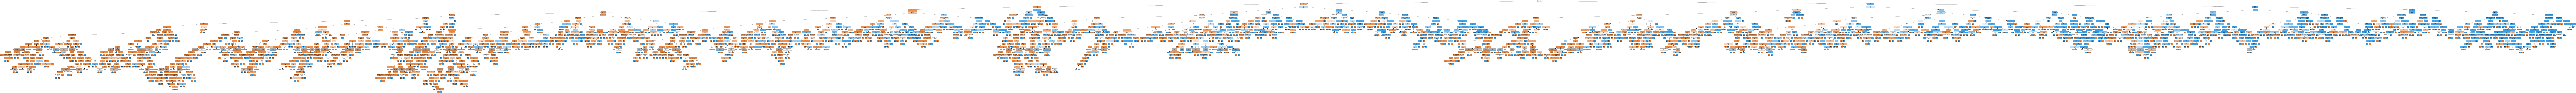

In [30]:
# importing libraries to vizualize decision tree
from sklearn import tree
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image  

# generating decision tree
dot_data = export_graphviz(dt_pipeline[1], out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# drawing graph
graph = graph_from_dot_data(dot_data)  

# showing graph of tree with no max depth
Image(graph.create_png())

We can see that as our decision tree with no hyperparameters is extremely granular in its treatment of our training data, and presumably has many leaves with only one sample, this model is overfit and has slightly better performance than prior models on recall(sensitivity), which makes sense for such an overfit model. However, this model performed poorer than either Logistic Regression models. 

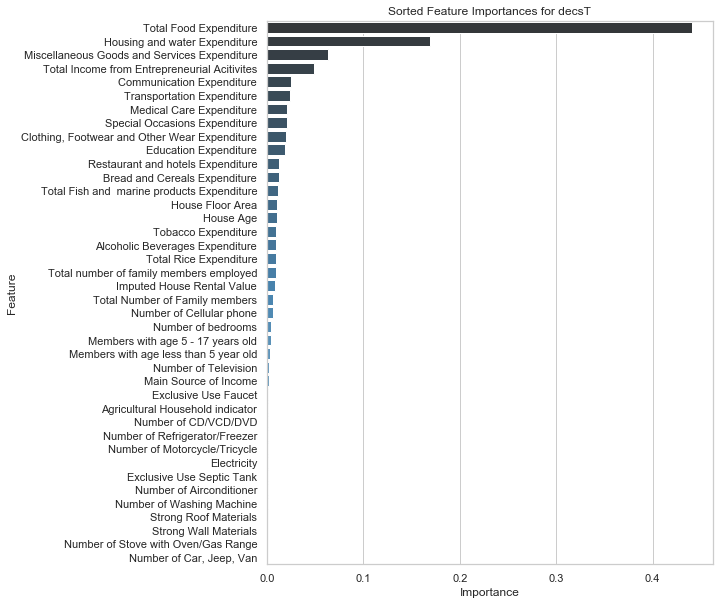

In [31]:
plot_feature_importances(dt_pipeline)

## Model 4 - Random Forest

Ensemble methods such as Random Forest help us to gain information through bagging(sampling with replacement) and subspace sampling(random feature selection), and control overfitting by assembling a model through repetition. We should be seeing high performance from this model when validating with our training data, as well as get more clarity on which features are consistently contributing to that strong performance.

In my first iteration of a Random Forest classifier, I created 100 estimators and used a max depth of 10. As I still have a comparatively high number of variables at 40, I am letting the trees have at least 10 layers of nodes before stopping. 


Training Accuracy Score: 1.0
Training F1 Score: 1.0
Test F1 Score: 0.9012
Test Accuracy Score: 0.9024
Test Precision Score: 0.9169
Test Recall Score: 0.8861


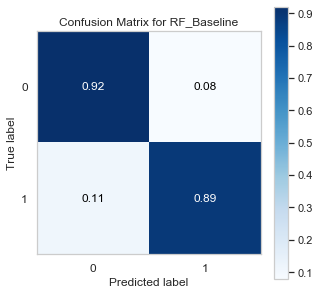

In [32]:
# importing library
from sklearn.ensemble import RandomForestClassifier

# creating pipeline
rfc_pipeline = Pipeline([('ss', StandardScaler()),
                          ('RF', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10))])

# fitting model
rfc_pipeline.fit(X_train, y_train)
y_pred_test = rfc_pipeline.predict(X_test)
y_pred_train = rfc_pipeline.predict(X_train)

# evaluating performance
print(f'Training Accuracy Score: {round(accuracy_score(y_train, y_pred_train))}')
print(f'Training F1 Score: {round(f1_score(y_train, y_pred_train))}')
evaluate_performance(y_test, y_pred_test, 'RF_Baseline')

### Model 4.1 - Random Forest with GridSearchCV
To iterate on this, I added a Grid Search in order to tune the hyperparameters (i.e. explore options for pruning the size of the tree). I tuned the max depth, the minimum size of a sample that can be split, and the minimum leaf size. Surprisingly, keeping no limit to the max_depth produced the best performing model with our test set, and this model performed well across score types. 

Training Accuracy Score: 1.0
Training F1 Score: 1.0
Test F1 Score: 0.9064
Test Accuracy Score: 0.9066
Test Precision Score: 0.9124
Test Recall Score: 0.9005


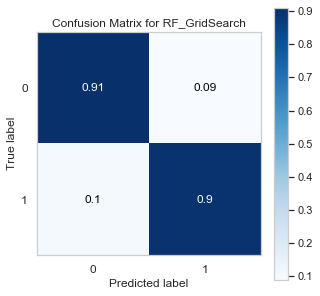

In [33]:
# importing libraries
from sklearn.model_selection import GridSearchCV, cross_val_score

# assembling GridSearch
grid = [{'RF__max_depth': [None, 5, 8, 10], 
         'RF__min_samples_split': [5, 8, 10], 
         'RF__min_samples_leaf': [3, 5]}]

RF_gridsearch = GridSearchCV(estimator=rfc_pipeline,
                          param_grid=grid,
                          scoring='accuracy',
                          cv=5,
                          return_train_score=True)

# Fit the training data
RF_gridsearch.fit(X_train, y_train)
y_pred_test = RF_gridsearch.predict(X_test)
y_pred_train = RF_gridsearch.predict(X_train)

# evaluating performance
print(f'Training Accuracy Score: {round(accuracy_score(y_train, y_pred_train))}')
print(f'Training F1 Score: {round(f1_score(y_train, y_pred_train))}')
evaluate_performance(y_test, y_pred_test, 'RF_GridSearch')                  

In [34]:
# printing best parameters
print("Best Parameter Combination Found During Random Forest Grid Search:")
RF_gridsearch.best_params_

Best Parameter Combination Found During Random Forest Grid Search:


{'RF__max_depth': None, 'RF__min_samples_leaf': 3, 'RF__min_samples_split': 8}

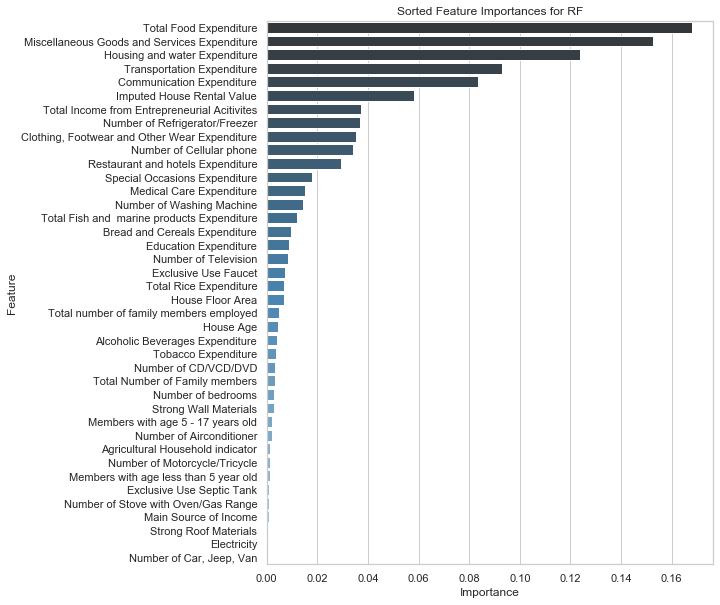

In [35]:
# plotting feature importance
plot_feature_importances(rfc_pipeline)

## Model 4 - XGBoost

My final set of models uses XGBoost (eXtreme Gradient Boosting), which is an ensemble modeling technique which uses weak learners such as short decision trees and the calculation of loss in order to iterate and create additional learners that focus on minimizing errors that were identified in prior models(in other words, following the descent). As this is an ensemble method, it's fairly resistant to overfitting as it is a compound of smaller models, and XGBoost in particular makes use of Lasso and Ridge regularization, as well as built in cross validation. 

Training Accuracy Score: 1.0
Training F1 Score: 1.0
Test F1 Score: 0.911
Test Accuracy Score: 0.9121
Test Precision Score: 0.9271
Test Recall Score: 0.8954


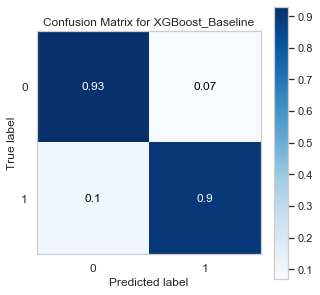

In [36]:
# importing XGBoost
import xgboost as xgb

# creating XGBoost pipeline
XGB_pipeline = Pipeline([('ss', StandardScaler()),
                          ('xgb', xgb.XGBClassifier())])

# fitting model
XGB_pipeline.fit(X_train, y_train)
y_pred_test = XGB_pipeline.predict(X_test)
y_pred_train = XGB_pipeline.predict(X_train)

# evaluating performance
print(f'Training Accuracy Score: {round(accuracy_score(y_train, y_pred_train))}')
print(f'Training F1 Score: {round(f1_score(y_train, y_pred_train))}')
evaluate_performance(y_test, y_pred_test, 'XGBoost_Baseline')                  

### Model 4.1 - XGBoost with GridSearchCV

Training Accuracy Score: 1.0
Training F1 Score: 1.0
Test F1 Score: 0.9158
Test Accuracy Score: 0.9166
Test Precision Score: 0.9296
Test Recall Score: 0.9024


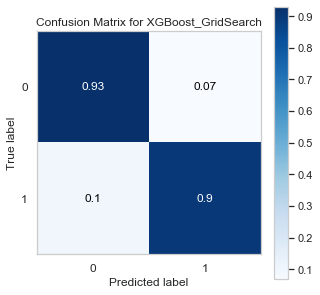

In [37]:
# creating GridSearch with range of hyperparameters
xg_grid = [{'xgb__learning_rate': [0.1],
            'xgb__max_depth': [5, 10],
            'xgb__min_child_weight': [1, 5],
            'xgb__n_estimators': [10, 30, 100]}]

# fitting gridsearch to classifier
XGB_gridsearch = GridSearchCV(XGB_pipeline, xg_grid, scoring='accuracy', n_jobs=1)
XGB_gridsearch.fit(X_train, y_train)
y_pred_test = XGB_gridsearch.predict(X_test)
y_pred_train = XGB_gridsearch.predict(X_train)

# evaluating performance
print(f'Training Accuracy Score: {round(accuracy_score(y_train, y_pred_train))}')
print(f'Training F1 Score: {round(f1_score(y_train, y_pred_train))}')
evaluate_performance(y_test, y_pred_test, 'XGBoost_GridSearch')                  

In [38]:
# printing best hyperparams from XGB Grid Search
print("Best Parameter Combination Found During XGB Grid Search:")
XGB_gridsearch.best_params_

Best Parameter Combination Found During XGB Grid Search:


{'xgb__learning_rate': 0.1,
 'xgb__max_depth': 5,
 'xgb__min_child_weight': 5,
 'xgb__n_estimators': 100}

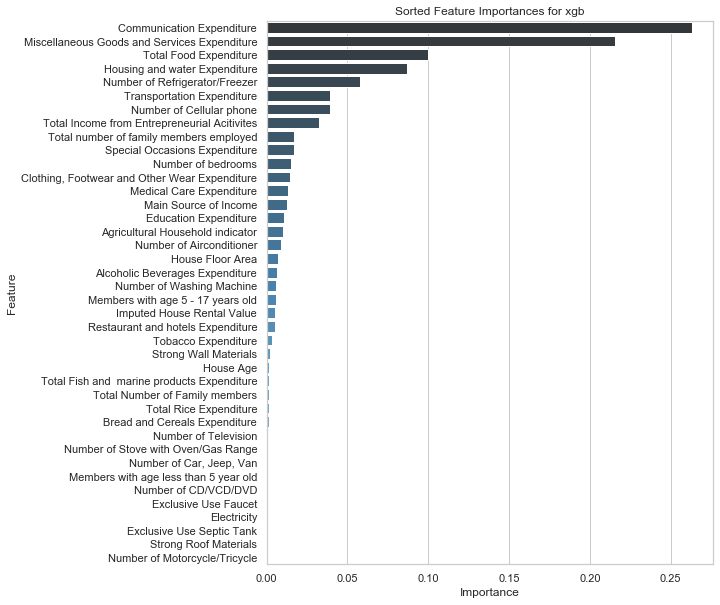

In [39]:
# plotting feature importance from XGB
plot_feature_importances(XGB_pipeline)

# Evaluating Model Performance

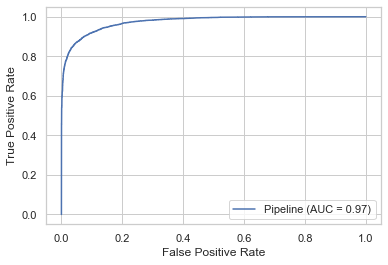

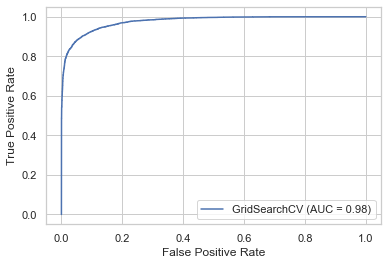

In [49]:
# saving roc curves for each model to a variable name
XGB_curve = plot_roc_curve(XGB_pipeline, X_test, y_test)
XGB_grid_curve = plot_roc_curve(XGB_gridsearch, X_test, y_test)

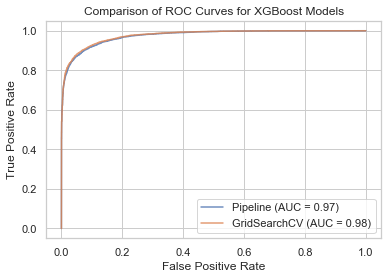

In [47]:
# plotting ROC curves together for XGBoost
ax = plt.gca()
XGB_curve.plot(ax=ax, alpha=0.8)
XGB_grid_curve.plot(ax=ax, alpha=0.8)
plt.title('Comparison of ROC Curves for XGBoost Models')
plt.show()

In [50]:
# showing final dataframe
model_df = pd.DataFrame({'Model_Name': model_names,
                         'F1_Score': f1_list,
                         'Accuracy_Score': accuracy_list,
                         'Precision_Score':precision_list,
                         'Recall_Score':recall_list})
model_df.style.background_gradient(cmap='Blues')

# Evaluation

We can see based on our dataframe that XGBoost with a GridSearch was the best performing model, which is not surprising given that it combines many of the best qualities of other models, with many enhancements such as regularization and hyperparameter tuning that enable some of the best and fastest modeling.

In my dataset, we can say with a high degree of confidence that we are able to identify the features that are most correlative to a household's total income. All of these modeling techniques highlighted an ability to accurately identify these above-the-median incomes with some skew towards recall or precision, but XGBoost was the most balanced in terms of performance.

## Further Work

As the Philippine's influence continues to grow while the country increasingly participates in trade and tourism, it will be increasingly important to gauge how the population fares. As there is widespread class inequality in the Philippines, not aided by the spread of the population amongst islands that are comparatively inaccessible, and it will be important to track how an increase in the country's wealth will be perhaps even more stratified based on Region.

It is also worth continuing to delve into the feature importance and review survey questions for details. As this survey takes place every three years, it is also worth comparing how the spread of expenditures may have been redistributed. 

Additionally, it may also be worth exploring which features could be combined or condensed. Although for this exercise I was interested in seeing feature importance at a granular level, there could be improvements made to reduce the number of expenditures and possessions based on their nature (i.e., meat and fish together, alcohol and tobacco, and perhaps number of large electronics and a category compounding the living condition aspects that could result in a "grade" rather than descriptions of a roof or wall. 